# Linear model, loss, gradient descent

This notebook introduces the concepts of loss and parameter optimisation by gradient descent.

We will use a simple, one dimensional linear model: $y = w*x + b$. However the principles extend to any model in any number of dimensions.

Our toy model assumes that there is a linear relationship between the number of minutes of sunshine in a ten minute window and the air temperature. With our (made up) historical dataset we can make predictions about the air temperature given how many minutes of sunshine there were in the last ten minutes.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

import numpy as np
np.random.seed(2)

In [2]:
# our toy data for this task
X = np.random.uniform(0, 10, size=20)
y = 1.3*X + 15 + np.random.normal(0, 1, size=20)

A useful tool for seeing what is in variables and how they relate to each other is `plt.plot()`. It takes two arrays as argument. One contains the X values and the other the Y values of the points you want to draw.

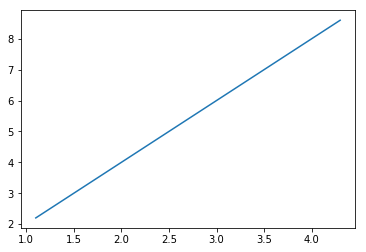

In [7]:
plt.plot([1.1, 2.3, 4.3], [2.2, 4.6, 8.6])

By default `plt.plot()` connects the points with a line, if you prefer to see the individual points you can pass a third argument that sets the marker style:

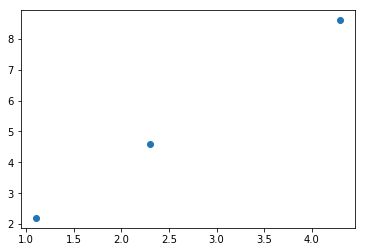

In [8]:
plt.plot([1.1, 2.3, 4.3], [2.2, 4.6, 8.6], 'o')

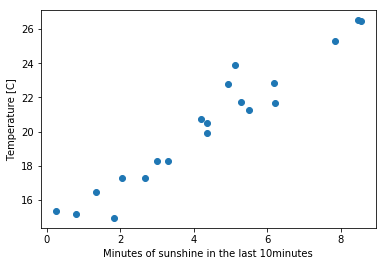

In [3]:
plt.plot(X, y, 'o')
plt.xlabel("Minutes of sunshine in the last 10minutes")
plt.ylabel("Temperature [C]");

To predict the temperature we measure the number of minutes of sunshine (say 4) and then look at our historical data and estimate that the remperature will be around 21C. To deal with the noise in the observations we average nearby observations in our head.

In [ ]:
line = np.linspace(0, 10, 100)
print(line)

In [ ]:
# use numpy to compute and plot your prediction for all values in `line`
# write your model so that you can later change the parameters
# `w` (the slope) and `b` (the offset).

If your `matplotlib` knowledge is a bit rusty checkout their gallery: https://matplotlib.org/gallery.html# Chances are you can find a plot very similar to what you want to do there.

## Regression vs Classification

Supervised learning can be split into two types: classification and regression. What kind of problem is this? Why?

## Loss

In one dimension, with a linear problem we humans do a very good job of
fitting a model to the data. How do we do it? We try and find a line that
has roughly the same number of points above it as below it. This way we
minimise the total distance between all the points and the line.

To make that intuition quantitative we use a loss function. A popular loss
function for regression problems is the squared loss: $ \ell(y, x) = (y - prediction(x))^2 $. This measures how close our prediction at $x$ is to the true value $y$ taken from our historical dataset.

To get the loss for the whole dataset we sum the loss for each point $\ell(y, x)$ over all samples. This is called the Mean square error (MSE), it is the average squared loss per sample over the whole dataset.

$$
L(D, w, b) = MSE = \frac{1}{N} \sum_{(x,y) \in D} (y - prediction(x))^2
$$

where $D$ is our training dataset and $N$ is the total number of samples in $D$.

Our $prediction(x)$ will depend on the parameters of the model. In our case $w$ and $b$. This means we can now judge how well each set of parameters is doing and pick the one with the smallest loss.

The total loss $L$ depends on $D$ and the values of our parameters $w$ and $b$.

In [ ]:
# write a function that computes the loss for a given set of
# parameters and training dataset
# plot the loss as a function of `w` for a fixed value of `b=15`
# can you identify the best fit value of `b`? Does it make sense?

## Parameter updates

We now have a way to compute how good a set of parameters is. Next we need a way to improve a set of parameters. For a new problem we usually start with a random guess of the value of the parameters and then need to iteratively improve them.

For each set of parameters we can compute the derivative of the loss at that point. We take the partial derivative of $L$ with respect to $w$ and $b$. This allows us to update our parameters by taking a step "downhill".

To compute the next best value of $w$ we update it according to:
$$
w_{new} = w - \alpha \frac{\partial L}{\partial w}
$$
The parameter $\alpha$ is called the learning rate, it sets how big a step we take.

Experiment with different values of the learning rate: [on the tensorflow playground](https://rawgit.com/tensorflow/playground/gh-pages/index.html?hl=en#activation=linear&batchSize=3&dataset=gauss&regDataset=reg-plane&learningRate=3&regularizationRate=0&noise=80&networkShape=&seed=0.245&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&tutorial=dp-reducing-loss-learning-rate&problem=classification&initZero=false&hideText=true&numHiddenLayers_hide=true&playButton_hide=true&dataset_hide=true&percTrainData_hide=true&noise_hide=true&batchSize_hide=true&xTimesY_hide=true&xSquared_hide=true&ySquared_hide=true&sinX_hide=true&sinY_hide=true&activation_hide=true&learningRate_hide=false&regularization_hide=true&regularizationRate_hide=true&problem_hide=true). The playground shows a two dimensional classification problem. Orange and blue dots. The goal is to find a good boundary to separate the two classes.

### Conceptual questions

The given learning rate - 3 - is pretty high. Observe how that high learning rate affects your model by clicking the "Step" button 10 or 20 times. After each iteration, look at how the model visualisation changes dramatically. You might even see some instability after the model appears to have converged.

Press the reset button. What happens when you reduce the learning rate to
a much smaller value? How many more steps does it take to reach convergence? Is there an optimal value for the learning rate?


### Coding
Next we will implement a simple gradient descent optimiser. The goal is to find the best values of `w` and `b` according to the loss function we are using (mean-squared error).

Feel free to use Wolfram alpha or similar to check you got the correct expression for the
partial derivative.

In [ ]:
# write the code to compute the gradient of the loss with respect to `w`
# and `b`.

In [ ]:
# write a for loop to perform ten iterations of gradient descent
# optimising both w and b starting from random values.
# What is one iteration? An alternative name is epoch. It is
# one complete loop through the training data.
# Classic optimisers will loop through whole dataset to compute
# the gradient before updating the parameters. This is wasteful
# if you have 10s or 100s of thousands of samples. You can get
# an estimate of the gradient with just a few hundred examples, or
# even just one. This is called stochastic gradient descent or
# stochastic mini-batch gradient descent.
#
# We don't have a lot of data, but let's still update the parameters
# after looking at each sample. If you have time implement mini-batches.
#
# To help debug start with one of the parameters set to its true
# value and only optimise the second one. Check the sign of the gradient.
# 
# Things to do once you have it working: plot the loss at each
# step/iteration.